## Introduction

A peace agreement was signed in Pretoria, South Africa in November 2022, two years after a horrific war broke out in Tigray, the northernmost region of Ethiopia. An estimated four hundreds thousand Tigrayan civilians were killed out of a population of 6 or 7 million, and a hundred thousand women were raped. The entire region was traumitized. Thousands of schools were damaged/closed and millions of children were out of school for over two years.  The vast majority of medical facilities were rendered inoperative. Young people in large number escaping reality through drugs and alcohol additions.  

One year after the peace agreement, fighting continued in western Tigray and 1 million internally displaced people (IDP) were living in over 600 IDP camps scattered across Tigray.  Most camps are have sub-standard living conditions--acute food and clean water shortages; many living in severely overcrowded rooms in damaged schools or in tents; no livelihood, nothing to return to even if peace is established back home.

In this lab, we look at IDP camp data collected in summer 2023.  The data set is large (638 rows or camp observations and 468 columns or attributes) so we begin with exploratory data analysis to get a feel for the data as a whole.  Our goal then shifts to adddressing the question of how an NGO concerned with the plight of IDPs might prioritize their efforts based on i) areas within Tigray that are underserved and ii) ranking of the severity  of the need of individual camps within underserved regions.

The IDP data we analyzed was obtained at https://data.humdata.org/dataset/ethiopia-displacement-northern-region-tigray-idps-site-assessment-iom-dtm?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import folium 

1. Let's put the IDP data into a dataframe called "idp" and then display the columns.

In [2]:
idp = pd.read_excel("IDP.xlsx")

2. Let's select certain columns for our analysis and put them into a dataframe "df".

In [3]:
columns_to_keep = [6,8,9,19,21,22,23,24, 35,36,37,49, 50, 51, 52, 53, 54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75, 76,77,78,89,94]  # Keep columns (125,148,163,197,221,295,376,398,425

# Use iloc to select the desired columns
df = idp.iloc[:, columns_to_keep]

df.columns

Index(['1.1.d.1: Site Name', '1.4.a.2: Is site open?', '1.1.e.1: Region',
       'OCHA Woreda', '1.1.f.1: GPS: Longitude', '1.1.f.2: GPS: Latitude',
       '1.4.a.1: Site Open Date', '1.4.b.1: Site Expected Closing Date',
       'M1594: What is the severity of site/area overcrowding',
       '1.2.u.1: # of SMC members?', '1.2.b.3: # Females in SMC',
       'S0113: SM name (Govt.)',
       '1.2.a.1: Is there any registration activity?',
       'S1479: Are there service providers on the site',
       '1.5.b.1: Region (Largest IDP group)',
       '1.5.b.2: Zone (Largest IDP group)',
       '1.5.b.3: Woreda (Largest IDP group)',
       '1.5.b.4: Kebele (Largest IDP group)',
       '1.5.c.1: Region (2nd largest IDP group)',
       '1.5.c.2: Zone (2nd largest IDP group)',
       '1.5.c.3: Woreda (2nd largest IDP group)',
       '1.5.c.4: Kebele (2nd largest IDP group)',
       'What are the biggest priority need(s) for IDPs in this site?',
       'What are the biggest priority need(s) for ID

3. Let's map the IDP camps with lat/lon data.

In [4]:
data = df.dropna(subset=['1.1.f.2: GPS: Latitude', '1.1.f.1: GPS: Longitude'])

# Create a Folium map centered on the first data point
map_center = [data['1.1.f.2: GPS: Latitude'].iloc[0], data['1.1.f.1: GPS: Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point in the DataFrame
for index, row in data.iterrows():
    folium.Marker(
        location=[row['1.1.f.2: GPS: Latitude'], row['1.1.f.1: GPS: Longitude']],
        popup=row['1.1.d.1: Site Name'],
        tooltip=row['1.1.d.1: Site Name']  # Display the name as a tooltip
    ).add_to(mymap)

# Save the map to an HTML file or display it
mymap.save('map_with_names.html')
mymap

4. We next encode numerically the information about the severity of camp overcrowding.

In [5]:
replacement_mapping= {'Very low': 1,'Low': 2,'Moderate': 3, 'High': 4, 'Very High': 5}
column_to_replace = 'M1594: What is the severity of site/area overcrowding'
for index, value in enumerate(df[column_to_replace]):
    if value in replacement_mapping:
        df.at[index, column_to_replace] = replacement_mapping[value]

row_to_drop = 0
# Use iloc to select the desired columns
df = df.drop(df.index[row_to_drop])

df.head(2)

,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.1: Region,OCHA Woreda,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,1.4.a.1: Site Open Date,1.4.b.1: Site Expected Closing Date,M1594: What is the severity of site/area overcrowding,1.2.u.1: # of SMC members?,...,What are the biggest priority need(s) for IDPs in this site?/NFIs (hygiene kits),What are the biggest priority need(s) for IDPs in this site?/Healthcare,What are the biggest priority need(s) for IDPs in this site?/Protection services,What are the biggest priority need(s) for IDPs in this site?/None,What are the biggest priority need(s) for IDPs in this site?/Other,"If Priority need is other, Please Specify",2.1.a.1: Total Number of IDP Families/HHs,2.1.b.7: Total Number of IDP Individuals,2.1.h.1: Number of Male (0-4 years),2.1.h.2: Number of Female (0-4 years)
1,Hareze Seb'ata,Yes,Tigray,Erob,39.58280,14.43946,2020-12-19,Unknown,4,NaN,...,No,No,No,No,No,NaN,2082,10410,354.0,354.0
2,Enda Mosa,Yes,Tigray,Erob,39.55493,14.42384,2020-12-19,Unknown,5,NaN,...,No,No,No,No,No,NaN,2046,10230,382.0,468.0


In [6]:
print(df.dtypes)
df['2.1.a.1: Total Number of IDP Families/HHs'] = df['2.1.a.1: Total Number of IDP Families/HHs'].astype(float)
df['2.1.b.7: Total Number of IDP Individuals'] = df['2.1.b.7: Total Number of IDP Individuals'].astype(float)
df['M1594: What is the severity of site/area overcrowding'] = df['M1594: What is the severity of site/area overcrowding'].astype(float)
print(df.dtypes)

1.1.d.1: Site Name                                                                                                 object
1.4.a.2: Is site open?                                                                                             object
1.1.e.1: Region                                                                                                    object
OCHA Woreda                                                                                                        object
1.1.f.1: GPS: Longitude                                                                                           float64
1.1.f.2: GPS: Latitude                                                                                            float64
1.4.a.1: Site Open Date                                                                                    datetime64[ns]
1.4.b.1: Site Expected Closing Date                                                                                object
M1594: What is the sever

5. We can display the size of camps with various levels of overcrowding.

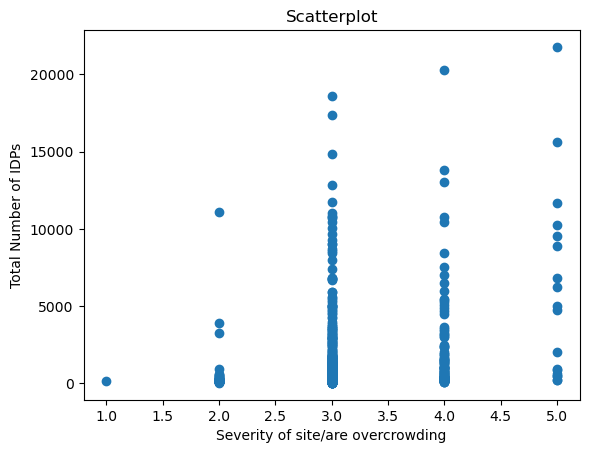

In [7]:
df['2.1.a.1: Total Number of IDP Families/HHs'] = df['2.1.a.1: Total Number of IDP Families/HHs'].astype(float)
df['2.1.b.7: Total Number of IDP Individuals'] = df['2.1.b.7: Total Number of IDP Individuals'].astype(float)
df['M1594: What is the severity of site/area overcrowding'] = df['M1594: What is the severity of site/area overcrowding'].astype(float)

plt.scatter(df['M1594: What is the severity of site/area overcrowding'], df['2.1.b.7: Total Number of IDP Individuals'])
plt.xlabel('Severity of site/are overcrowding')
plt.ylabel('Total Number of IDPs')
plt.title('Scatterplot')
plt.show()

6. Next, let's binary encode the primary needs.

In [8]:
def map_yes_no(value):
    return 1 if value == 'Yes' else 0
specified_columns = ['What are the biggest priority need(s) for IDPs in this site?/Food', 
                     'What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets)',
                     'What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets)', 
                     'What are the biggest priority need(s) for IDPs in this site?/Education', 
                     'What are the biggest priority need(s) for IDPs in this site?/Housing, Land and Properties (HLP) support', 
                     'What are the biggest priority need(s) for IDPs in this site?/Shelter',
                    'What are the biggest priority need(s) for IDPs in this site?/NFI (Kitchen sets)',
                    'What are the biggest priority need(s) for IDPs in this site?/WASH', 
                    'What are the biggest priority need(s) for IDPs in this site?/Livelihoods',
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (emergency shelter kits)',
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (hygiene kits)',
                    'What are the biggest priority need(s) for IDPs in this site?/Healthcare',
                    'What are the biggest priority need(s) for IDPs in this site?/Protection services',
                    'What are the biggest priority need(s) for IDPs in this site?/None',
                    'What are the biggest priority need(s) for IDPs in this site?/Other']

binary_columns = df[specified_columns].applymap(map_yes_no)

# Create a new column with the sum of 'yes' and 'no' occurrences across specified columns
df['Total Needs'] = binary_columns.sum(axis=1)
df[specified_columns] = df[specified_columns].replace({'Yes': 1, 'No': 0})
# Display the DataFrame with the new column
print("\nDataFrame with the new column:")
df.head(1)


DataFrame with the new column:


,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.1: Region,OCHA Woreda,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,1.4.a.1: Site Open Date,1.4.b.1: Site Expected Closing Date,M1594: What is the severity of site/area overcrowding,1.2.u.1: # of SMC members?,...,What are the biggest priority need(s) for IDPs in this site?/Healthcare,What are the biggest priority need(s) for IDPs in this site?/Protection services,What are the biggest priority need(s) for IDPs in this site?/None,What are the biggest priority need(s) for IDPs in this site?/Other,"If Priority need is other, Please Specify",2.1.a.1: Total Number of IDP Families/HHs,2.1.b.7: Total Number of IDP Individuals,2.1.h.1: Number of Male (0-4 years),2.1.h.2: Number of Female (0-4 years),Total Needs
1,Hareze Seb'ata,Yes,Tigray,Erob,39.5828,14.43946,2020-12-19,Unknown,4.0,NaN,...,0,0,0,0,NaN,2082.0,10410.0,354.0,354.0,3


7. The binary code can be scaled according to a camp's needs. 

In [9]:
need_values = {'What are the biggest priority need(s) for IDPs in this site?/Food': 10, 
                     'What are the biggest priority need(s) for IDPs in this site?/NFIs (bedding sets)': 8,
                     'What are the biggest priority need(s) for IDPs in this site?/NFI (Mosquito Nets)': 3, 
                     'What are the biggest priority need(s) for IDPs in this site?/Education': 2, 
                     'What are the biggest priority need(s) for IDPs in this site?/Housing, Land and Properties (HLP) support': 5, 
                     'What are the biggest priority need(s) for IDPs in this site?/Shelter': 9,
                    'What are the biggest priority need(s) for IDPs in this site?/NFI (Kitchen sets)': 6,
                    'What are the biggest priority need(s) for IDPs in this site?/WASH': 7, 
                    'What are the biggest priority need(s) for IDPs in this site?/Livelihoods': 1,
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (emergency shelter kits)': 8,
                    'What are the biggest priority need(s) for IDPs in this site?/NFIs (hygiene kits)': 5,
                    'What are the biggest priority need(s) for IDPs in this site?/Healthcare': 4,
                    'What are the biggest priority need(s) for IDPs in this site?/Protection services': 10,
                    'What are the biggest priority need(s) for IDPs in this site?/None': 0,
                    'What are the biggest priority need(s) for IDPs in this site?/Other': 0}
for column, multiplier in need_values.items():
    df[column] = df[column] * multiplier
df['Scaled Total Needs'] = df[list(need_values.keys())].sum(axis=1)
df.head(2)

,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.1: Region,OCHA Woreda,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,1.4.a.1: Site Open Date,1.4.b.1: Site Expected Closing Date,M1594: What is the severity of site/area overcrowding,1.2.u.1: # of SMC members?,...,What are the biggest priority need(s) for IDPs in this site?/Protection services,What are the biggest priority need(s) for IDPs in this site?/None,What are the biggest priority need(s) for IDPs in this site?/Other,"If Priority need is other, Please Specify",2.1.a.1: Total Number of IDP Families/HHs,2.1.b.7: Total Number of IDP Individuals,2.1.h.1: Number of Male (0-4 years),2.1.h.2: Number of Female (0-4 years),Total Needs,Scaled Total Needs
1,Hareze Seb'ata,Yes,Tigray,Erob,39.58280,14.43946,2020-12-19,Unknown,4.0,NaN,...,0,0,0,NaN,2082.0,10410.0,354.0,354.0,3,17
2,Enda Mosa,Yes,Tigray,Erob,39.55493,14.42384,2020-12-19,Unknown,5.0,NaN,...,0,0,0,NaN,2046.0,10230.0,382.0,468.0,3,20


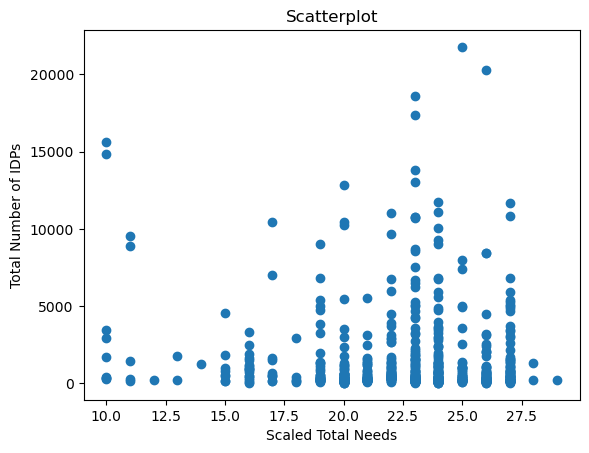

R-squared value: 0.0017848734079480674


In [10]:
plt.scatter(df['Scaled Total Needs'], df['2.1.b.7: Total Number of IDP Individuals'])
plt.xlabel('Scaled Total Needs')
plt.ylabel('Total Number of IDPs')
plt.title('Scatterplot')
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(df['Scaled Total Needs'], df['2.1.b.7: Total Number of IDP Individuals'])
r_squared = r_value**2

print(f'R-squared value: {r_squared}')

8. Data can be filtered by various need criteria as specified by an NGO,  including a cap on the total scaled need. One example is shown below.

In [11]:
condition_need1 = (df['What are the biggest priority need(s) for IDPs in this site?/Food'] > 0)

condition_need2 = (df['What are the biggest priority need(s) for IDPs in this site?/Shelter'] >0)

filtered_df = df[condition_need1 & condition_need2]

threshold_value = 21
filtered_df = filtered_df[filtered_df['Scaled Total Needs'] < threshold_value]
filtered_df.head(1)

,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.1: Region,OCHA Woreda,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,1.4.a.1: Site Open Date,1.4.b.1: Site Expected Closing Date,M1594: What is the severity of site/area overcrowding,1.2.u.1: # of SMC members?,...,What are the biggest priority need(s) for IDPs in this site?/Protection services,What are the biggest priority need(s) for IDPs in this site?/None,What are the biggest priority need(s) for IDPs in this site?/Other,"If Priority need is other, Please Specify",2.1.a.1: Total Number of IDP Families/HHs,2.1.b.7: Total Number of IDP Individuals,2.1.h.1: Number of Male (0-4 years),2.1.h.2: Number of Female (0-4 years),Total Needs,Scaled Total Needs
2,Enda Mosa,Yes,Tigray,Erob,39.55493,14.42384,2020-12-19,Unknown,5.0,NaN,...,0,0,0,NaN,2046.0,10230.0,382.0,468.0,3,20


9. We can also add the proportion of children under age 4 and sort the camps by this proportion.

In [12]:
fdf=filtered_df
fdf['Scaled Population Needs'] = fdf['Scaled Total Needs'] * fdf['2.1.b.7: Total Number of IDP Individuals']
fdf['Total Children 4 or Under'] = fdf['2.1.h.1: Number of Male (0-4 years)'] + fdf['2.1.h.2: Number of Female (0-4 years)']
fdf['Proportion of Children'] = fdf['Total Children 4 or Under'] / fdf['2.1.b.7: Total Number of IDP Individuals']
fdf['Proportion of Children'] = fdf['Proportion of Children'].round(3)

In [13]:
fdf_sorted = fdf.sort_values(by='Proportion of Children', ascending=False)
fdf_sorted.head(1)

,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.1: Region,OCHA Woreda,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,1.4.a.1: Site Open Date,1.4.b.1: Site Expected Closing Date,M1594: What is the severity of site/area overcrowding,1.2.u.1: # of SMC members?,...,"If Priority need is other, Please Specify",2.1.a.1: Total Number of IDP Families/HHs,2.1.b.7: Total Number of IDP Individuals,2.1.h.1: Number of Male (0-4 years),2.1.h.2: Number of Female (0-4 years),Total Needs,Scaled Total Needs,Scaled Population Needs,Total Children 4 or Under,Proportion of Children
171,Enda Berihu,Yes,Tigray,Sheraro town,37.7684,14.3879,2022-02-15,Unknown,3.0,3.0,...,NaN,29.0,129.0,16.0,15.0,3,20,2580.0,31.0,0.24


10. We can create a map with the NGO's filtering and the proporion of children under age 4.

In [14]:
data = fdf.dropna(subset=['1.1.f.2: GPS: Latitude', '1.1.f.1: GPS: Longitude'])

# Create a Folium map centered on the first data point
map_center = [data['1.1.f.2: GPS: Latitude'].iloc[0], data['1.1.f.1: GPS: Longitude'].iloc[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point in the DataFrame
for index, row in data.iterrows():
    marker = row['1.1.d.1: Site Name'] + ' ' + str(row['Proportion of Children'])
    folium.Marker(
        location=[row['1.1.f.2: GPS: Latitude'], row['1.1.f.1: GPS: Longitude']],
        popup=row['1.1.d.1: Site Name']+ ' ' + str(row['Proportion of Children']),
        tooltip=marker  # Display the name as a tooltip
    ).add_to(mymap)

# Save the map to an HTML file or display it
mymap.save('NGO map_with_names.html')
mymap